✅ Data Loaded Successfully

Shape: (10000, 24)


,Body Frame,Type of Hair,Color of Hair,Skin,Complexion,Body Weight,Nails,Size and Color of the Teeth,Pace of Performing Work,Mental Activity,...,Mood,Eating Habit,Hunger,Body Temperature,Joints,Nature,Body Energy,Quality of Voice,Body Odor,Dosha
0,Well Built,Dry,Grey,"Soft,Sweating",Pinkish,Underweight,Redish,"Large,White",Fast,Aggressive,...,Changes Quickly,Irregular Chewing,Skips Meal,Less than Normal,Weak,"Forgiving,Grateful",Medium,Deep,Strong,Pitta
1,Thin and Lean,Normal,Brown,"Moist,Greasy",Dark,Overweight,Blackish,"Medium,Yellowish",Medium,Aggressive,...,Changes Quickly,Improper Chewing,Sudden and Sharp,Normal,Heavy,"Forgiving,Grateful",Medium,Deep,Strong,Kapha
2,Well Built,Dry,Brown,"Dry,Rough",Dark,Underweight,Pinkish,"Medium,Yellowish",Fast,Restless,...,Constant,Proper Chewing,Skips Meal,More than Normal,Weak,"Jealous,Fearful",Low,Fast,Strong,Pitta
3,Thin and Lean,Greasy,Brown,"Soft,Sweating",Pinkish,Overweight,Pinkish,"Irregular,Blackish",Slow,Restless,...,Constant,Irregular Chewing,Sudden and Sharp,Normal,Heavy,"Forgiving,Grateful",Medium,Rough,Negligible,Kapha
4,Well Built,Normal,Black,"Soft,Sweating",Pinkish,Normal,Blackish,"Medium,Yellowish",Fast,Restless,...,Changes Slowly,Improper Chewing,Irregular,More than Normal,Healthy,"Forgiving,Grateful",Low,Deep,Negligible,Vata



Missing Values:
 Body Frame                           0
Type of Hair                         0
Color of Hair                        0
Skin                                 0
Complexion                           0
Body Weight                          0
Nails                                0
Size and Color of the Teeth          0
Pace of Performing Work              0
Mental Activity                      0
Memory                               0
Sleep Pattern                        0
Weather Conditions                   0
Reaction under Adverse Situations    0
Mood                                 0
Eating Habit                         0
Hunger                               0
Body Temperature                     0
Joints                               0
Nature                               0
Body Energy                          0
Quality of Voice                     0
Body Odor                            0
Dosha                                0
dtype: int64


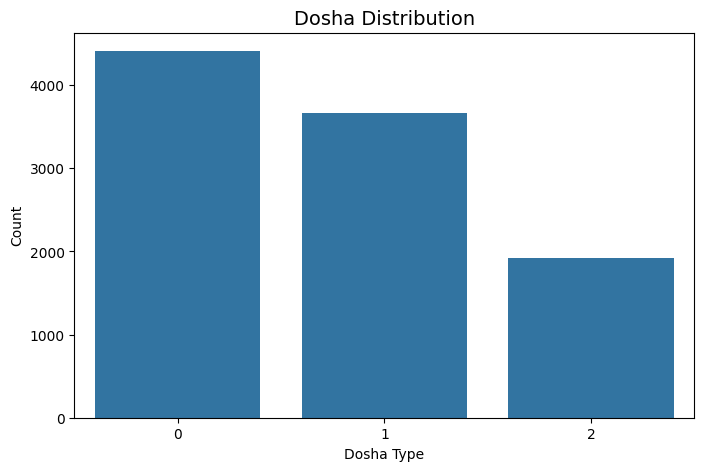

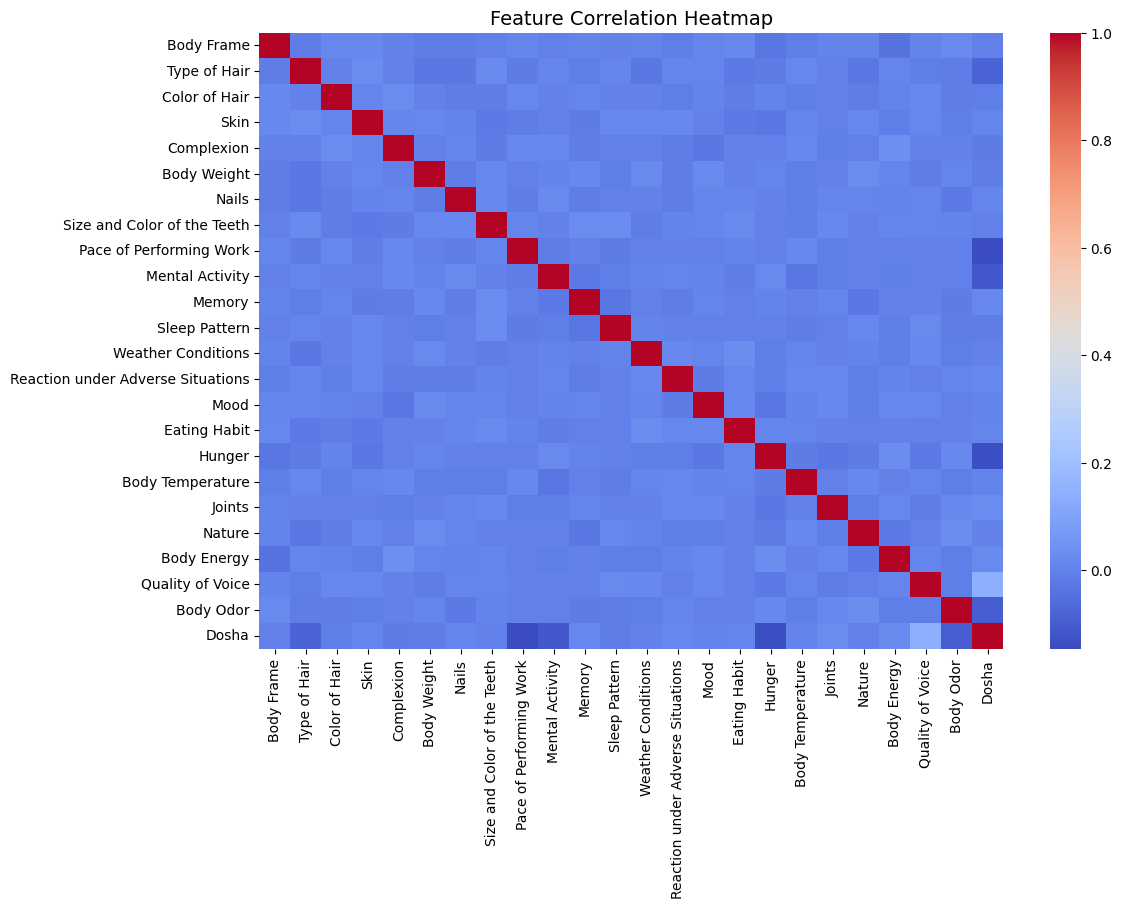


🔹 Training Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67       882
           1       0.68      0.72      0.70       734
           2       0.70      0.38      0.49       384

    accuracy                           0.65      2000
   macro avg       0.67      0.61      0.62      2000
weighted avg       0.66      0.65      0.65      2000



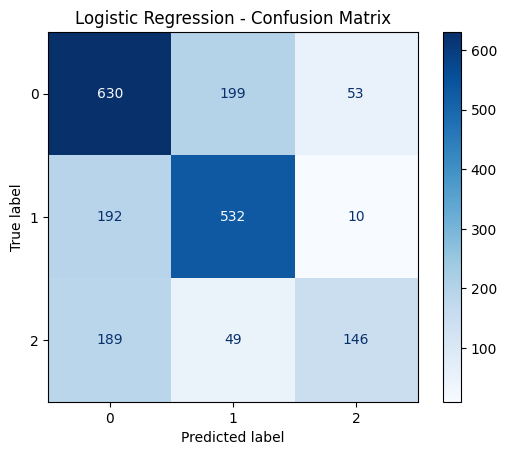

💾 Model saved as logistic_regression_model.pkl
✅ Accuracy: 0.654

🔹 Training Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       882
           1       0.98      0.98      0.98       734
           2       0.98      0.93      0.96       384

    accuracy                           0.97      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



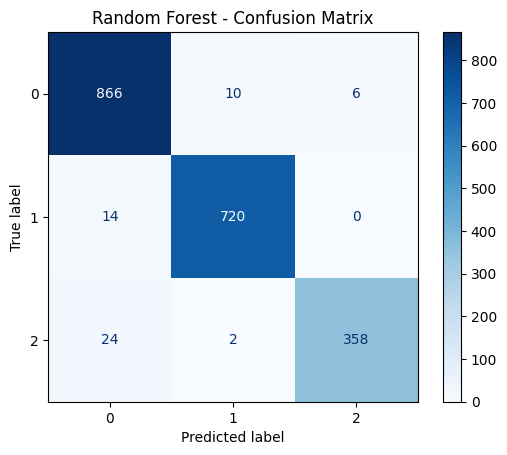

💾 Model saved as random_forest_model.pkl
✅ Accuracy: 0.972

🔹 Training SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       882
           1       0.89      0.92      0.91       734
           2       0.85      0.51      0.64       384

    accuracy                           0.83      2000
   macro avg       0.84      0.77      0.79      2000
weighted avg       0.83      0.83      0.82      2000



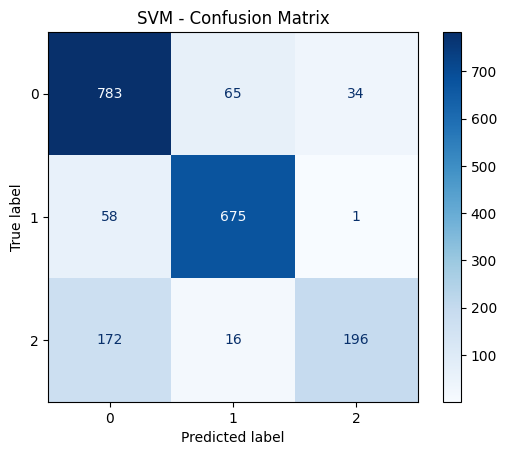

💾 Model saved as svm_model.pkl
✅ Accuracy: 0.827

🔹 Training KNN

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       882
           1       0.71      0.76      0.74       734
           2       0.71      0.45      0.55       384

    accuracy                           0.69      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.69      0.69      0.69      2000



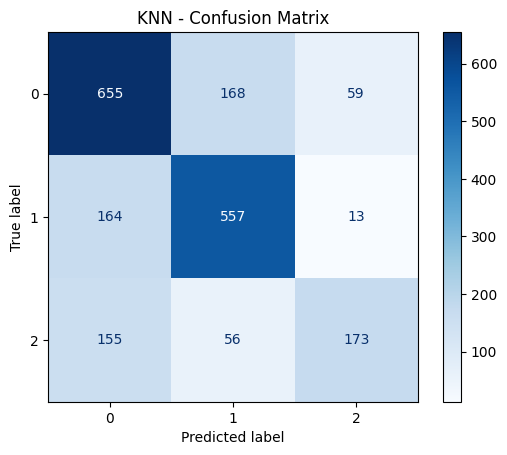

💾 Model saved as knn_model.pkl
✅ Accuracy: 0.693

MODEL PERFORMANCE SUMMARY:

Logistic Regression       -> Accuracy: 0.654
Random Forest             -> Accuracy: 0.972
SVM                       -> Accuracy: 0.827
KNN                       -> Accuracy: 0.693


C:\Users\python main\AppData\Local\Temp\ipykernel_2300\1236015793.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


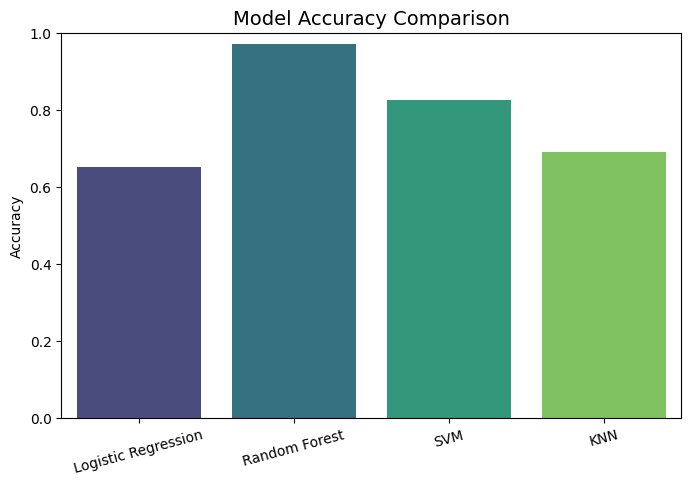


🎯 All models trained and saved successfully!


In [4]:
# ==========================
# 🧠 DOSHA CLASSIFICATION NOTEBOOK
# ==========================

# --- IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pickle
import os

# --- LOAD DATA ---
file_path = "dataset.csv"   # Change to your dataset name

if file_path.endswith(".csv"):
    df = pd.read_csv(file_path)
else:
    df = pd.read_excel(file_path)

print("✅ Data Loaded Successfully\n")
print("Shape:", df.shape)
display(df.head())

# --- CHECK FOR MISSING VALUES ---
print("\nMissing Values:\n", df.isnull().sum())

# --- HANDLE MISSING VALUES IF ANY ---
df = df.dropna().reset_index(drop=True)

# --- ENCODE CATEGORICAL VARIABLES ---
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# --- DEFINE FEATURES & TARGET ---
X = df.drop('Dosha', axis=1)
y = df['Dosha']

# --- STANDARDIZE FEATURES ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ==========================
# 📊 DATA VISUALIZATION
# ==========================

# Distribution of target
plt.figure(figsize=(8,5))
sns.countplot(x=y)
plt.title("Dosha Distribution", fontsize=14)
plt.xlabel("Dosha Type")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


# ==========================
# 🤖 MODEL TRAINING
# ==========================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    print(f"\n==============================")
    print(f"🔹 Training {name}")
    print("==============================")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # --- Classification Report ---
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # --- Save Model ---
    model_filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    pickle.dump(model, open(model_filename, "wb"))
    print(f"💾 Model saved as {model_filename}")

    # --- Accuracy ---
    acc = model.score(X_test, y_test)
    results[name] = acc
    print(f"✅ Accuracy: {acc:.3f}")

# ==========================
# 📈 PERFORMANCE SUMMARY
# ==========================
print("\nMODEL PERFORMANCE SUMMARY:\n")
for model_name, acc in results.items():
    print(f"{model_name:25s} -> Accuracy: {acc:.3f}")

# --- Accuracy Bar Plot ---
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

print("\n🎯 All models trained and saved successfully!")


In [6]:
# --- Save feature names, label encoders, and scaler for prediction ---
pickle.dump(X.columns.tolist(), open("feature_names.pkl", "wb"))
pickle.dump(label_encoders, open("label_encoders.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

print("💾 Feature names, encoders, and scaler saved successfully!")


💾 Feature names, encoders, and scaler saved successfully!
